# Bikes Data Exploration
### by Jeong ha, Park

## Preliminary Wrangling

This document explores datasets containing time, station and other attribures for approximately 405,000 bikes in New York.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 

%matplotlib inline

In [15]:
# load in the dataset into a pandas dataframe, print statistics
foldername = '2019_bts_LA'
df_stack_LA = getDataFrame(foldername)
df_2019_LA = getdata_FromCSVfile(df_stack_LA, foldername)
df_2019_LA.head()

(121904, 15)


C:\Users\parnx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


(214028, 15)
(290343, 15)
2019_bts_LA.csv


C:\Users\parnx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (0,1,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
1,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.247490,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard
2,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.247490,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard
3,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard
4,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard
5,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard


In [16]:
foldername = '2019_citibike_NY'
df_stack_NY = getDataFrame(foldername)
df_2019_NY = getdata_FromCSVfile(df_stack_NY, foldername)
df_2019_NY.head()

(38242, 15)
(61848, 15)
(94904, 15)
(131039, 15)
(170469, 15)
(214215, 15)
(262926, 15)
(312170, 15)
(354423, 15)
(385220, 15)
(404948, 15)
2019_citibike_NY.csv


C:\Users\parnx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (0,3,5,6,7,9,10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.7162469,-74.0334588,3214,Essex Light Rail,40.7127742,-74.0364857,29612,Subscriber,1993,1
2,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29213,Subscriber,1972,2
3,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.7162469,-74.0334588,3192,Liberty Light Rail,40.7112423,-74.0557013,26164,Subscriber,1985,1
4,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29672,Customer,1969,0
5,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29522,Customer,1969,0


In [14]:
# the fuction to get dataframe to be stacked monthly datasets.
def getDataFrame(data_folder):
    
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
    
    i = 0
    df_stack = pd.DataFrame()
    for file_csv in os.listdir(data_folder):
        
        i = i+1
        if i == 1:
            df_dummy = pd.DataFrame()
            df_first = pd.read_csv(data_folder + '/' + file_csv, sep=',', header = None) 
            df_stack = pd.concat([df_first, df_dummy], ignore_index = True)
            df_stack.head()            
        else:
            df_next = pd.read_csv(data_folder + '/' + file_csv, sep=',', header = None, skiprows = 1)
            df_stack = pd.concat([df_stack, df_next], ignore_index = True)
            print(df_stack.shape)

    return df_stack

In [3]:
# function to make CSV file and tp get dataframe.
def getdata_FromCSVfile(df, csvfile):
    df.to_csv(csvfile + '.csv', index = False)
    print(csvfile + '.csv')
    df_bike = pd.read_csv(csvfile + '.csv', encoding='utf-8')

    new_header = df_bike.iloc[0]
    df_bike = df_bike[1:]
    df_bike.columns = new_header
    df_bike.reset_index()
    df_bike.head()
    
    return df_bike

In [18]:
# get LA station from CSV 
df_station_LA = pd.read_csv('metro-bike-share-stations-2020-01-01.csv')
df_station_LA.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


In [19]:
df_2019_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404947 entries, 1 to 404947
Data columns (total 15 columns):
tripduration               404947 non-null object
starttime                  404947 non-null object
stoptime                   404947 non-null object
start station id           404947 non-null object
start station name         404947 non-null object
start station latitude     404947 non-null object
start station longitude    404947 non-null object
end station id             404947 non-null object
end station name           404947 non-null object
end station latitude       404947 non-null object
end station longitude      404947 non-null object
bikeid                     404947 non-null object
usertype                   404947 non-null object
birth year                 404947 non-null object
gender                     404947 non-null object
dtypes: object(15)
memory usage: 46.3+ MB


In [20]:
df_2019_NY.describe()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,404947,404947,404947,404947,404947,404947.000000,404947.000000,404947,404947,404947.000000,404947.000000,404947,404947,404947,404947
unique,9619,404943,404943,104,53,122.000000,127.000000,174,120,192.000000,197.000000,1102,2,130,6
top,251,2019-05-28 18:23:46.2400,2019-03-21 09:11:33.5360,3186,Grove St PATH,40.719586,-74.043117,3186,Grove St PATH,40.719586,-74.043117,29584,Subscriber,1969,1
freq,927,2,2,37868,46662,37868.000000,37868.000000,49325,58697,49325.000000,49325.000000,952,361921,23921,236556


In [22]:
df_2019_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290342 entries, 1 to 290342
Data columns (total 15 columns):
trip_id                290342 non-null object
duration               290342 non-null object
start_time             290342 non-null object
end_time               290342 non-null object
start_station          290342 non-null object
start_lat              285505 non-null object
start_lon              285505 non-null object
end_station            290342 non-null object
end_lat                279757 non-null object
end_lon                279757 non-null object
bike_id                290342 non-null object
plan_duration          290342 non-null object
trip_route_category    290342 non-null object
passholder_type        290342 non-null object
bike_type              290342 non-null object
dtypes: object(15)
memory usage: 33.2+ MB


In [23]:
df_2019_LA.describe()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
count,290342,290342,290342,290342,290342,285505.0000,285505.000000,290342,279757.0000,279757.000000,290342,290342,290342,290342,290342
unique,290342,1837,217112,211394,364,405.0000,411.000000,367,407.0000,413.000000,5151,8,2,6,3
top,134404363,5,2019-02-22 16:52:00,2019-02-22 12:59:00,3005,34.0485,-118.258537,3005,34.0485,-118.258537,16422,30,One Way,Monthly Pass,standard
freq,1,14228,9,17,10851,10851.0000,10851.000000,11368,11368.0000,11368.000000,723,139745,247034,172665,154217


In [208]:
# Copy the datasets

df_2019_NY_clean = df_2019_NY.copy()
df_2019_LA_clean = df_2019_LA.copy()
df_station_LA_clean = df_station_LA.copy()

In [209]:
# drop the unnecessary columns in df_2019_NY_clean, df_2019_LA_clean
df_2019_NY_clean.drop('start station latitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('start station longitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('end station latitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('end station longitude', axis = 1, inplace = True)
df_2019_NY_clean.drop('start station id', axis = 1, inplace = True)
df_2019_NY_clean.drop('end station id', axis = 1, inplace = True)

df_2019_LA_clean.drop('start_lat', axis = 1, inplace = True)
df_2019_LA_clean.drop('start_lon', axis = 1, inplace = True)
df_2019_LA_clean.drop('end_lat', axis = 1, inplace = True)
df_2019_LA_clean.drop('end_lon', axis = 1, inplace = True)
df_2019_LA_clean.drop('trip_id', axis = 1, inplace = True)

In [210]:
#   Change starttime, stoptime, birth year into the datetype in df_2019_NY_clean, df_2019_LA_clean
df_2019_NY_clean['starttime'] = pd.to_datetime(df_2019_NY_clean['starttime'])
df_2019_NY_clean['stoptime'] = pd.to_datetime(df_2019_NY_clean['stoptime'])
df_2019_NY_clean['birth year'] = pd.to_datetime(df_2019_NY_clean['birth year']).dt.strftime('%Y')
df_2019_NY_clean['tripduration'] = df_2019_NY_clean['tripduration'].astype(int)

df_2019_LA_clean['start_time'] = pd.to_datetime(df_2019_LA_clean['start_time'])
df_2019_LA_clean['end_time'] = pd.to_datetime(df_2019_LA_clean['end_time'])
df_2019_LA_clean['duration'] = df_2019_LA_clean['duration'].astype(int)

df_station_LA_clean['Station_ID'] = df_station_LA_clean['Station_ID'].astype(str)

In [125]:
df_2019_NY_clean.describe()
df_2019_LA_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290342 entries, 1 to 290342
Data columns (total 10 columns):
duration               290342 non-null int32
start_time             290342 non-null datetime64[ns]
end_time               290342 non-null datetime64[ns]
start_station          290342 non-null object
end_station            290342 non-null object
bike_id                290342 non-null object
plan_duration          290342 non-null object
trip_route_category    290342 non-null object
passholder_type        290342 non-null object
bike_type              290342 non-null object
dtypes: datetime64[ns](2), int32(1), object(7)
memory usage: 21.0+ MB


In [213]:
# change columns name in NY, LA.
df_2019_NY_clean.rename(columns = { 'tripduration': 'Trip_Duration'
                                 ,'starttime':'Start_Time', 'stoptime':'End_Time'
                                 , 'start station name':'Start_Station'
                                 , 'end station name':'End_Station'
                                 , 'bikeid':'Bke_ID', 'usertype':'User_Type'
                                 , 'birth year':'Birth_Year', 'gender':'Gender'}, inplace = True)
df_2019_NY_clean.head(0)

,Trip_Duration,Start_Time,End_Time,Start_Station,End_Station,Bke_ID,User_Type,Birth_Year,Gender


In [212]:
df_2019_LA_clean.rename(columns = {'duration':'Trip_Duration','start_time':'Start_Time','end_time':'End_Time'
                                   ,'start_station':'Start_Station','end_station':'End_Station'
                                   ,'bike_id':'Bike_ID','plan_duration':'Plan_Duration'
                                  ,'trip_route_category':'Trip_Route','passholder_type':'Passholder'
                                  ,'bike_type':'Bike_Type'}, inplace = True)
df_2019_LA_clean.head(0)

,Trip_Duration,Start_Time,End_Time,Start_Station,End_Station,Bike_ID,Plan_Duration,Trip_Route,Passholder,Bike_Type


In [214]:
df_station_LA_clean.rename(columns = {'Go_live_date' : 'Go_Live_date'}, inplace = True)
df_station_LA_clean.head(0)

,Station_ID,Station_Name,Go_Live_date,Region,Status


In [215]:
# change categoty code with data values(gender in df_2019_NY, station code in df_2019_LA_clean)
df_2019_NY_clean.head(3)

,Trip_Duration,Start_Time,End_Time,Start_Station,End_Station,Bke_ID,User_Type,Birth_Year,Gender
1,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,Exchange Place,Essex Light Rail,29612,Subscriber,1993,1
2,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,Exchange Place,Washington St,29213,Subscriber,1972,2
3,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,Exchange Place,Liberty Light Rail,26164,Subscriber,1985,1


In [216]:
# Gender (Zero=unknown; 1=male; 2=female)
df_2019_NY_clean['Gender'] = df_2019_NY_clean['Gender'].apply(lambda x: 'Male' if x == '1' else ('Female' if x=='2' else 'Unknown'))    
df_2019_NY_clean['Gender'].head(5)

1       Male
2     Female
3       Male
4    Unknown
5    Unknown
Name: Gender, dtype: object

In [217]:
capitalize = lambda x: x.title()
df_2019_LA_clean['Bike_Type'] = df_2019_LA_clean['Bike_Type'].apply(capitalize)
df_2019_LA_clean.head()

,Trip_Duration,Start_Time,End_Time,Start_Station,End_Station,Bike_ID,Plan_Duration,Trip_Route,Passholder,Bike_Type
1,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,1,One Way,Walk-up,Standard
2,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,1,One Way,Walk-up,Standard
3,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,1,One Way,Walk-up,Standard
4,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,1,One Way,Walk-up,Standard
5,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,1,One Way,Walk-up,Standard


In [218]:
# trip duration is so large numbers, so express the minute unit.
df_2019_NY_clean['Trip_Duration'].describe()

count    4.049470e+05
mean     7.258427e+02
std      9.785237e+03
min      6.100000e+01
25%      2.330000e+02
50%      3.450000e+02
75%      5.800000e+02
max      2.566420e+06
Name: Trip_Duration, dtype: float64

In [221]:
df_2019_NY_clean.rename(columns = {'Trip_Duration': 'Trip_Duration(s)'}, inplace =True)
df_2019_NY_clean.head(0)

,Trip_Duration(s),Start_Time,End_Time,Start_Station,End_Station,Bke_ID,User_Type,Birth_Year,Gender


In [222]:
df_2019_NY_clean['Trip_Duration(m)'] = df_2019_NY_clean['Trip_Duration(s)'].apply(lambda x: round(x/60, 2))
df_2019_NY_clean['Trip_Duration(m)'].describe()

count    404947.000000
mean         12.097376
std         163.087298
min           1.020000
25%           3.880000
50%           5.750000
75%           9.670000
max       42773.670000
Name: Trip_Duration(m), dtype: float64

In [223]:
# make the same time unit dataset of trip duration of LA
df_2019_LA_clean['Trip_Duration'].describe()

count    290342.000000
mean         31.080798
std         119.910178
min           1.000000
25%           6.000000
50%          11.000000
75%          22.000000
max        1440.000000
Name: Trip_Duration, dtype: float64

In [224]:
df_2019_LA_clean.rename(columns = {'Trip_Duration': 'Trip_Duration(s)'}, inplace =True)
df_2019_LA_clean.head(0)

,Trip_Duration(s),Start_Time,End_Time,Start_Station,End_Station,Bike_ID,Plan_Duration,Trip_Route,Passholder,Bike_Type


In [225]:
df_2019_LA_clean['Trip_Duration(m)'] = df_2019_LA_clean['Trip_Duration(s)'].apply(lambda x: round(x/60, 2))
df_2019_LA_clean['Trip_Duration(m)'].describe()

count    290342.000000
mean          0.518086
std           1.998493
min           0.020000
25%           0.100000
50%           0.180000
75%           0.370000
max          24.000000
Name: Trip_Duration(m), dtype: float64

In [283]:
df_station_LA_clean.head()

,Station_Name,Go_Live_date,Region,Status
Station_ID,,,,
3000,Virtual Station,7/7/2016,NaN,Active
3005,7th & Flower,7/7/2016,DTLA,Active
3006,Olive & 8th,7/7/2016,DTLA,Active
3007,5th & Grand,7/7/2016,DTLA,Active
3008,Figueroa & 9th,7/7/2016,DTLA,Active


In [276]:
df_2019_LA_clean.head()

,Trip_Duration(s),Start_Time,End_Time,Start_Station,End_Station,Bike_ID,Plan_Duration,Trip_Route,Passholder,Bike_Type,Trip_Duration(m),Start_Hour,End_Hour
1,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,1,One Way,Walk-up,Standard,0.12,AM,AM
2,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,1,One Way,Walk-up,Standard,0.10,AM,AM
3,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,1,One Way,Walk-up,Standard,0.53,AM,AM
4,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,1,One Way,Walk-up,Standard,0.50,AM,AM
5,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,1,One Way,Walk-up,Standard,0.47,AM,AM


In [593]:
# function to make the new column 'AM', "PM" , Hour,Week in df_2019_LA_clean, df_2019_NY_clean
def set_time(dataset):
    dataset["Start_Hour"] = dataset['Start_Time'].dt.hour
    dataset["Start_Noon"] = dataset["Start_Hour"].apply(lambda x :'PM' if x >= 12 else 'AM')
    dataset["Start_Hour"] = dataset["Start_Hour"].astype(str)
    dataset["End_Hour"] = dataset['End_Time'].dt.hour
    dataset["End_Noon"] = dataset["End_Hour"].apply(lambda x :'PM' if x >= 12 else 'AM')   
    dataset["End_Hour"] = dataset["End_Hour"].astype(str)
    
    dataset["Start_Month"] = dataset['Start_Time'].dt.month   
    dataset["Start_Month"] = dataset["Start_Month"].astype(str)
    dataset["Start_Weekday"] = dataset['Start_Time'].dt.day_name()
    #dataset["Start_Weekday"] = dataset["Start_Weekday"][:3]
    #dataset["Start_Weekday"] = dataset['Start_Time'].dt.weekday
    
set_time(df_2019_NY_clean)
set_time(df_2019_LA_clean)

In [588]:
df_2019_LA_clean.head(3)

,Trip_Duration(s),Start_Time,End_Time,Start_Station,End_Station,Bike_ID,Plan_Duration,Trip_Route,Passholder,Bike_Type,Trip_Duration(m),Start_Hour,End_Hour,Start_Noon,End_Noon,Start_Month,Start_Weekday
1,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,1,One Way,Walk-up,Standard,0.12,0,0,AM,AM,1,Tuesday
2,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,1,One Way,Walk-up,Standard,0.10,0,0,AM,AM,1,Tuesday
3,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,1,One Way,Walk-up,Standard,0.53,0,0,AM,AM,1,Tuesday


In [586]:
df_2019_NY_clean.head(3)

,Trip_Duration(s),Start_Time,End_Time,Start_Station,End_Station,Bke_ID,User_Type,Birth_Year,Gender,Trip_Duration(m),Start_Hour,End_Hour,Start_Noon,End_Noon,Start_Month,Start_Weekday
1,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,Exchange Place,Essex Light Rail,29612,Subscriber,1993,Male,3.35,3,3,AM,AM,1,Tuesday
2,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,Exchange Place,Washington St,29213,Subscriber,1972,Female,8.42,5,5,AM,AM,1,Tuesday
3,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,Exchange Place,Liberty Light Rail,26164,Subscriber,1985,Male,12.60,10,10,AM,AM,1,Tuesday


In [765]:
df_2019_NY_clean.info()#['Start_Hour'].value_counts().index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404947 entries, 1 to 404947
Data columns (total 16 columns):
Trip_Duration(s)    404947 non-null int32
Start_Time          404947 non-null datetime64[ns]
End_Time            404947 non-null datetime64[ns]
Start_Station       404947 non-null object
End_Station         404947 non-null object
Bke_ID              404947 non-null object
User_Type           404947 non-null category
Birth_Year          404947 non-null object
Gender              404947 non-null category
Trip_Duration(m)    404947 non-null float64
Start_Hour          404947 non-null category
End_Hour            404947 non-null object
Start_Noon          404947 non-null object
End_Noon            404947 non-null object
Start_Month         404947 non-null category
Start_Weekday       404947 non-null category
dtypes: category(5), datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 34.4+ MB


In [610]:
# change categoty type(user_type, gender in NY, Trip_route Passholder Bike_type in LA
# Monday is 1 and Sunday is 7


ordinal_NY_dict = {'Gender' : ['Female', 'Male','Unknown'],
                    'User_Type' : ['Subscriber', 'Customer'],
                  'Start_Hour': ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
                  'Start_Month': ['1','2','3','4','5','6','7','8','9','10','11','12'],
                  'Start_Weekday' : ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']}
for var in ordinal_NY_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_NY_dict[var])
    df_2019_NY_clean[var] = df_2019_NY_clean[var].astype(ordered_var)


ordinal_LA_dict = {'Trip_Route' : ['One Way','Round Trip'],
                    'Passholder' : ['Walk-up','One Day Pass','Monthly Pass','Annual Pass','Flex Pass','Testing'],
                    'Bike_Type' : ['Standard', 'Electric', 'Smart'],
                  'Start_Hour': ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
                   'Start_Month': ['1','2','3','4','5','6','7','8','9','10','11','12'],
                   'Start_Weekday' : ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']}
for var in ordinal_LA_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_LA_dict[var])
    df_2019_LA_clean[var] = df_2019_LA_clean[var].astype(ordered_var)


In [611]:
df_2019_NY_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404947 entries, 1 to 404947
Data columns (total 16 columns):
Trip_Duration(s)    404947 non-null int32
Start_Time          404947 non-null datetime64[ns]
End_Time            404947 non-null datetime64[ns]
Start_Station       404947 non-null object
End_Station         404947 non-null object
Bke_ID              404947 non-null object
User_Type           404947 non-null category
Birth_Year          404947 non-null object
Gender              404947 non-null category
Trip_Duration(m)    404947 non-null float64
Start_Hour          404947 non-null category
End_Hour            404947 non-null object
Start_Noon          404947 non-null object
End_Noon            404947 non-null object
Start_Month         404947 non-null category
Start_Weekday       404947 non-null category
dtypes: category(5), datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 34.4+ MB


In [612]:
df_2019_LA_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290342 entries, 1 to 290342
Data columns (total 17 columns):
Trip_Duration(s)    290342 non-null int32
Start_Time          290342 non-null datetime64[ns]
End_Time            290342 non-null datetime64[ns]
Start_Station       290342 non-null object
End_Station         290342 non-null object
Bike_ID             290342 non-null object
Plan_Duration       290342 non-null object
Trip_Route          290342 non-null category
Passholder          290342 non-null category
Bike_Type           290342 non-null category
Trip_Duration(m)    290342 non-null float64
Start_Hour          290342 non-null category
End_Hour            290342 non-null object
Start_Noon          290342 non-null object
End_Noon            290342 non-null object
Start_Month         290342 non-null category
Start_Weekday       290342 non-null category
dtypes: category(6), datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 24.9+ MB


In [614]:
bikes_NY = df_2019_NY_clean.copy()
bikes_LA = df_2019_LA_clean.copy()

### What is the structure of your dataset?

There are 404,947 bikes in New Yorkwith features .
(New York : Trip_Duration, Start_Time, End_Time, Start_Station, End_Station, Bke_ID, User_Type,  Birth_Year, Gender, Start_Hour, End_Hour)

Type of Trip_Duration variable is originally int and its statistic is expressed with other types. So I made original Trip_Duration divide Trip_Duration(s): seconds, Trip_Duration(m):minutes. 
And the variables User_Type, Gender, Trip_Route and Passholder are categorical types with the following.
I also made new columns, Start_Hour, End_Hour, Start_Noon(AM/PM), End_Noon, Start_Month, Start_Weekday for good analysis.

Gender : Female, Male, Unknown <br>
User_Type : Subscriber, Customer <br>
Trip_Rout : One Way, Round Trip <br>
Passholder : Walk-up, One Day Pass ,Monthly Pass, Annual Pass, Flex Pass ,Testing <br>
Bike_Type : Standard, Electric, Smart <br>


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in the following:
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that most trips are taken in 10~12 AM. and In the afternoon, it seems to be distributed evenly by time zone.
Also, most trips are in weelends and in June, July August.
I also think that the user type(Subscriber, Customer) will have effects on the trips.

## Univariate Exploration

I'll start to calculate the average trip taken and depend on if a user is a subscriber or customer in New York.
I'll start by looking at the distribution of the main variable of interest: time, tripduration.

In [236]:
bikes_NY['Trip_Duration(m)'].describe()

count    404947.000000
mean         12.097376
std         163.087298
min           1.020000
25%           3.880000
50%           5.750000
75%           9.670000
max       42773.670000
Name: Trip_Duration(m), dtype: float64

In [237]:
bikes_NY['Trip_Duration(s)'].mean(), bikes_NY['Trip_Duration(m)'].mean()

(725.8427152195226, 12.097376273932285)

In [244]:
bikes_NY.groupby('User_Type').mean()

,Trip_Duration(s),Trip_Duration(m)
User_Type,,
Subscriber,521.968372,8.699470
Customer,2440.768721,40.679481


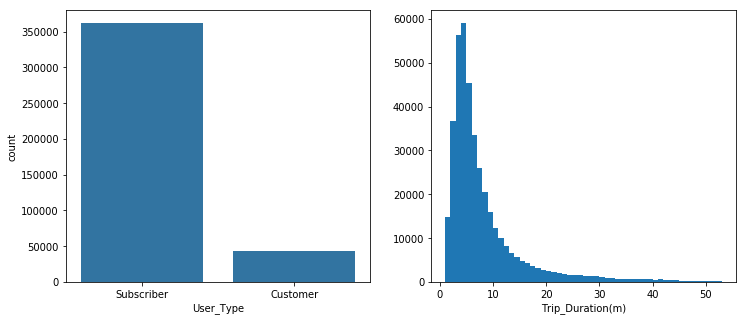

In [628]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# subplot 1: 
plt.subplot(1, 2, 1)
sb.countplot(data = bikes_NY, x = 'User_Type', color = base_color);

# subplot 2: 
ax = plt.subplot(1, 2, 2)

bins = np.arange(1, 52.2 + 1, 1)
plt.hist(data=bikes_NY, x = 'Trip_Duration(m)', bins = bins);
ax.set_xlabel('Trip_Duration(m)')

plt.show()

#### The count of subscriber is much more than the count of customer in New Youk.  It is almost 7 times. The people riding less than 52 minutes are 98.44% of the total. They are distributed in 10 minutes below.

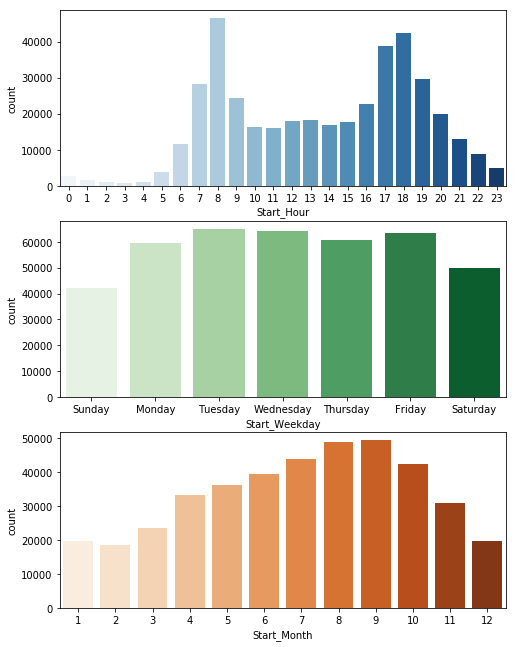

In [627]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 11])

# subplot 1: hour
plt.subplot(3, 1, 1)
sb.countplot(data = bikes_NY, x = 'Start_Hour', palette = 'Blues');

# subplot 2: day of week
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes_NY, x = 'Start_Weekday', palette = 'Greens');
#ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: month
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes_NY, x = 'Start_Month', palette = 'Oranges')
#ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

#### People usually ride on 7~8 am and on 17~19 pm by the time of day. And people prefer to ride on the days of week than the weekends. Also they ride between April and October.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
 The number of subscribers is much more than the number of customers and the people who are 98.44% almost used the bikes for about 10 minutes below in New York. By times, People usually ride on 7~8 am and on 17~19 pm by the time of day. And people prefer to ride on the days of week than the weekends. Also they ride between April and October by the month of the year.
    Under the transformation, the data looked bimodal by the time of day, with one peak on 8 am, and another between 17 and 18 pm.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No. there are not unusual distributions. They are appeared as expected.

## Bivariate Exploration

To start off with, I want to look at the most trips taken in terms of time of day, day of the week, or month of the year by user tyoe in the data.

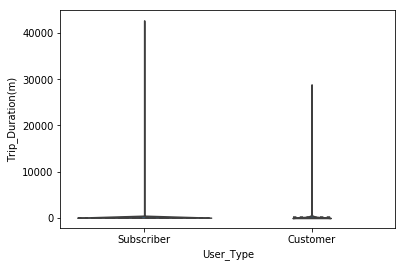

In [250]:
sb.violinplot(data=bikes_NY, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile');

#### I can't any feature about the total data in this polt. I saw the statistic of New York's Trip_Duration(minute)  then most of the data is in the 75% category. After I divide the data into two part: 75% below and 75% over, I analyze the two datasets each. 

In [662]:
value_first = bikes_NY['Trip_Duration(m)'].describe()[6] #9.67
bikes_NY_below9 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_first]
bikes_NY_over9 = bikes_NY[bikes_NY['Trip_Duration(m)'] > value_first]

value_second = bikes_NY_over9['Trip_Duration(m)'].describe()[6]      #  24.620000
bikes_NY_below24 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_second]
bikes_NY_over24 = bikes_NY[bikes_NY['Trip_Duration(m)'] > value_second]

value_third = bikes_NY_over24['Trip_Duration(m)'].describe()[6]  #52.13
bikes_NY_below52 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_third]
bikes_NY_over52 = bikes_NY[bikes_NY['Trip_Duration(m)'] > value_third]

In [500]:
value_fourth = bikes_NY_over52['Trip_Duration(m)'].describe()[6]  #121.775
value_fourth
bikes_NY_below121 = bikes_NY[bikes_NY['Trip_Duration(m)'] <= value_fourth]

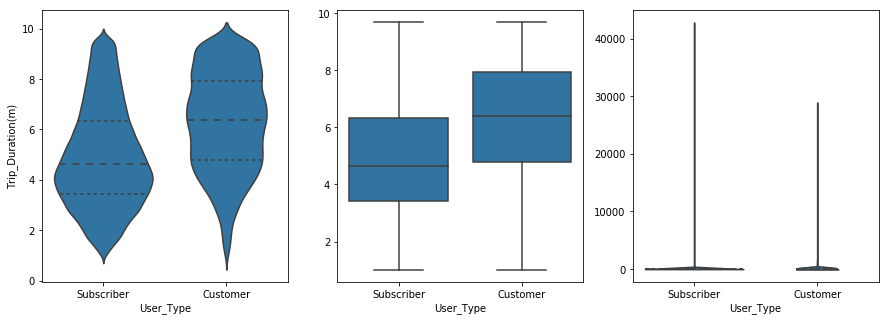

In [630]:
plt.figure(figsize = [15, 5])

# subplot 1: 
plt.subplot(1, 3, 1)
sb.violinplot(data=bikes_NY_below9, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile')

# subplot 2:
ax = plt.subplot(1, 3, 2)
sb.boxplot(data=bikes_NY_below9, y= 'Trip_Duration(m)', x='User_Type', color= base_color)
ax.set_ylabel('')

# subplot 3: 
ax = plt.subplot(1, 3, 3)
sb.violinplot(data=bikes_NY_over9, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile')
ax.set_ylabel('')
plt.show()

####  The first and second plot : The 303,849 data who are 75% usually ride the bikes for about 5 minutes(4.72) on average. Longest ride is 9.67 minutes and Shortest time is 1.02 minutes. By user type, subscribers ride the bikes for about 5 minutes on average and customers rides for 6 minutes on average . Most of subscribers ride for about 5 minutes and most of customers ride for 5 ~ 8 minutes. It seems that customers ride longer than subscribers. 
####  The third plot : But It is difficult for  the 101,098 data(people) who are 75% over to analyze because it is distributed over a wide time period. Therefore, the statistics of data existing between 75% and 100% of the total data were re-analyzed and re-analyzed by user type based on 52 minutes.

In [390]:
(bikes_NY_below52['Trip_Duration(m)'].describe()[0] / bikes_NY['Trip_Duration(m)'].describe()[0]) * 100

98.44152444640903

In [764]:
bikes_NY_below52.describe()

,Trip_Duration(s),Trip_Duration(m),Weekday_Num
count,398636.000000,398636.000000,398636.000000
mean,490.233193,8.170551,2.776779
std,443.990950,7.399848,1.907051
min,61.000000,1.020000,0.000000
25%,231.000000,3.850000,1.000000
50%,340.000000,5.670000,3.000000
75%,562.000000,9.370000,4.000000
max,3128.000000,52.130000,6.000000


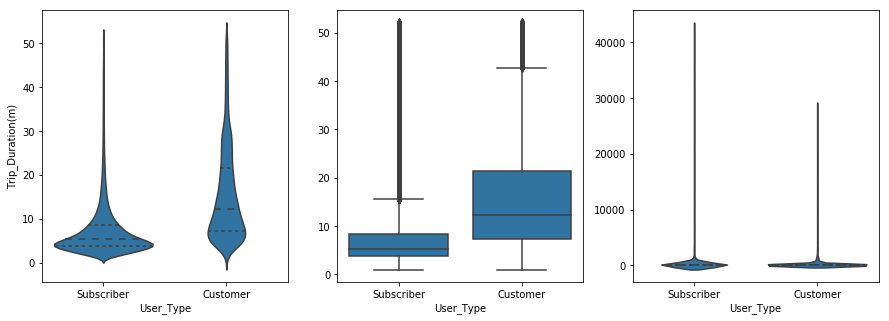

In [762]:
plt.figure(figsize = [15, 5])

# subplot 1: 
plt.subplot(1, 3, 1)
sb.violinplot(data=bikes_NY_below52, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile');

# subplot 2: 
ax = plt.subplot(1, 3, 2)
sb.boxplot(data=bikes_NY_below52, y= 'Trip_Duration(m)', x='User_Type', color= base_color);
ax.set_ylabel('')

# subplot 3: 
ax = plt.subplot(1, 3, 3)
sb.violinplot(data=bikes_NY_over52, y= 'Trip_Duration(m)', x='User_Type', color= base_color, inner = 'quartile')
ax.set_ylabel('')
plt.show()

#### The first and second plot : The people riding less than 52 minutes are 98.44% of the total. The subscribers of them usually ride for 5.67 minutes on average and the customers of them ride for 12 minutes on average. It seems that customers ride longer than subscribers. The third plot : But It is also difficult for  the 6311 data(people) who are 75% over to analyze because it is distributed over a wide time period. 

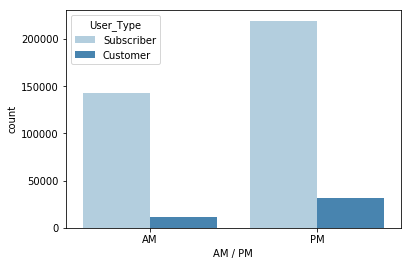

In [527]:
sb.countplot(data = bikes_NY, x = 'Start_Noon', hue = 'User_Type', palette = 'Blues')
plt.xlabel('AM / PM');

#### People(both subscribers and customers) ride usually on PM than AM. 

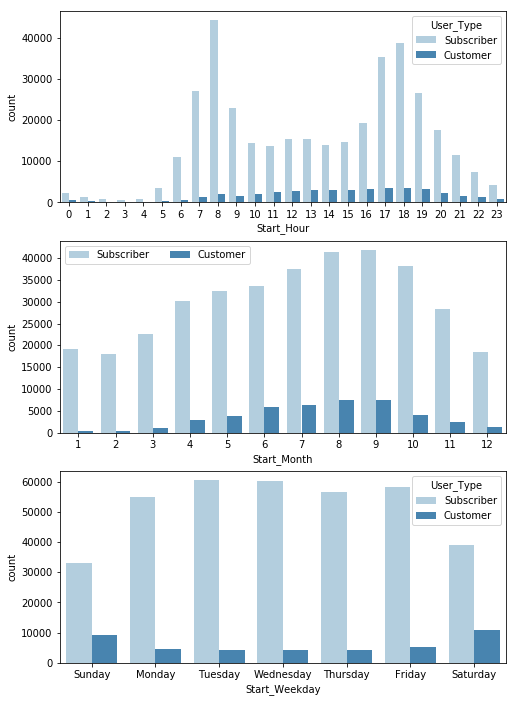

In [617]:
plt.figure(figsize = [8, 12])

# subplot 1: hour
plt.subplot(3, 1, 1)
sb.countplot(data = bikes_NY, x = 'Start_Hour', hue = 'User_Type', palette = 'Blues');

# subplot 2: day of week
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes_NY, x = 'Start_Month', hue = 'User_Type', palette = 'Blues');
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: month
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes_NY, x = 'Start_Weekday', hue = 'User_Type', palette = 'Blues');

plt.show()

#### Both subscribers and customers ride most around 8 am and around 5-6 pm in the afternoon. And generally evenly distributed between April and November .  Both subscribers and customers ride a lot in August, September.  One peculiar thing is that subscribers prefer to use the bikes on the days of the week  while customers prefer on the weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The trip duraion is closely related to the time, even before transforming the features. The variables of time are hour, days of week and months of year and each variables was analized by user type. The clustered plot seems to be the best for analyzing time-of-day user types. 
    
In the case of the analysis graph by time, the bimodal is drawn, and the daily and monthly analysis graphs are drawn with one peak
  
In particular, the time-phase analysis and monthly analysis showed similar trends by user type, whereas the day-by-week analysis showed a slightly different trend between subscribers and customers. Subscribers have higher weekdays, while customers have higher weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No. I didn't observe anything between the other features.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the four categorical measures of time(am/pm, hour, week, month) play into the relationship each other by user type.

In [647]:
bikes_NY.head()

,Trip_Duration(s),Start_Time,End_Time,Start_Station,End_Station,Bke_ID,User_Type,Birth_Year,Gender,Trip_Duration(m),Start_Hour,End_Hour,Start_Noon,End_Noon,Start_Month,Start_Weekday
1,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,Exchange Place,Essex Light Rail,29612,Subscriber,1993,Male,3.35,3,3,AM,AM,1,Tuesday
2,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,Exchange Place,Washington St,29213,Subscriber,1972,Female,8.42,5,5,AM,AM,1,Tuesday
3,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,Exchange Place,Liberty Light Rail,26164,Subscriber,1985,Male,12.60,10,10,AM,AM,1,Tuesday
4,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,Exchange Place,Washington St,29672,Customer,1969,Unknown,26.25,12,13,PM,PM,1,Tuesday
5,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,Exchange Place,Washington St,29522,Customer,1969,Unknown,26.10,12,13,PM,PM,1,Tuesday


In [650]:
bikes_NY['Weekday_Num'] = bikes_NY['Start_Time'].dt.weekday

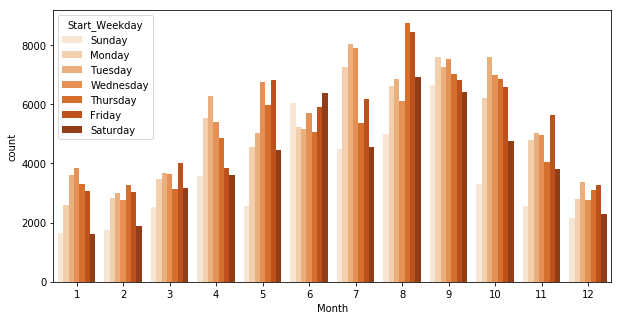

In [694]:
plt.figure(figsize = [10, 5])
sb.countplot(data = bikes_NY, x = 'Start_Month', hue = 'Start_Weekday', palette = 'Oranges')
plt.xlabel('Month');

#### The highest rate of bicycle use between May and October

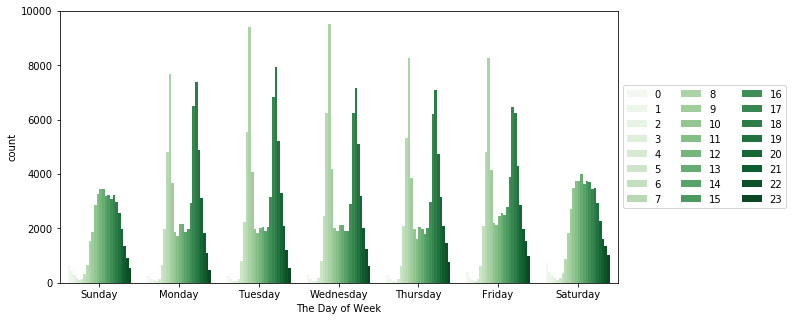

In [761]:
plt.figure(figsize = [10, 5])
g = sb.countplot(data = bikes_NY, x = 'Start_Weekday', hue = 'Start_Hour', palette = 'Greens')
g.legend(ncol = 3, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('The Day of Week');

#### Day-by-week analysis: Weekdays, bicycle usage is high in the morning and afternoon hours, and bimodal is drawn. On the other hand, there is little morning usage on weekends and high afternoon usage.

C:\Users\parnx\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


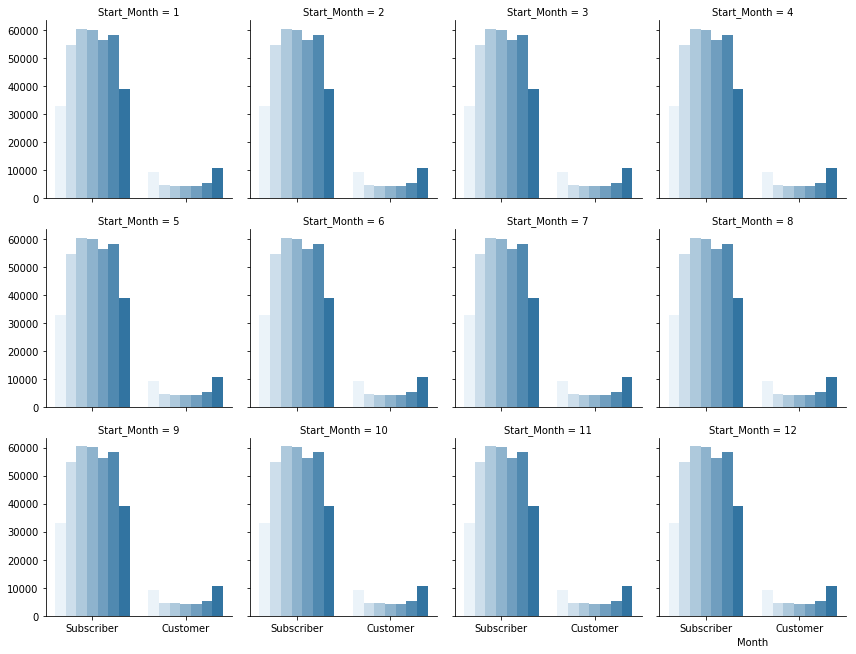

In [742]:
g = sb.FacetGrid(data=bikes_NY, col='Start_Month', col_wrap = 4)  #, size = 4, aspect = 1.5
g.map(sb.countplot, data = bikes_NY, x = 'User_Type', hue = 'Start_Weekday')
plt.xlabel('Month');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The graph shows the number of times the bicycle was used for each day of the month. The monthly analysis of the days of the most used bicycles is as follows:
January: Wednesday, February: Thursday, March: Friday, April: Tuesday, May: Wednesday / Friday, June: Saturday, July: Tuesday / Wednesday, August: Friday / Saturday, September: Monday / Wednesday, October: Tuesday, November: Friday, December: Tuesday


The analysis shows that there is no particular relationship between specific days of week and frequency of use. The most significant result in this graph, as mentioned earlier, is the highest rate of bicycle use between May and October.

In addition, the number of times the bicycles were used for each day of each month was analyzed by user type. The results showed the same trend, so there was no big difference by user type.

### Were there any interesting or surprising interactions between features?

As a result of comparing and analyzing daily / monthly bicycle use rate and each hour / day use rate, the rate of daily / monthly bicycle use rate showed similar trend and the difference was not known. However, it was found that the difference in frequency of use by hour and week differs significantly between weekend and weekday.